# 14_DL from scratch - 예제 2

# 숫자 맞추기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [2]:
# softmax의 정의
def Softmax(x):
    x = np.subtract(x, np.max(x))       # prevent overflow
                    # 기준이 되는 값
                        # 뺄셈할 값

    ex = np.exp(x)

    return ex / np.sum(ex)

In [3]:
X = np.zeros((5,5,5))

X[:, :, 0] = [ [0,1,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,0,1,0,0], [0,1,1,1,0] ]
X[:, :, 1] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [1,0,0,0,0], [1,1,1,1,1] ]
X[:, :, 2] = [ [1,1,1,1,0], [0,0,0,0,1], [0,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]
X[:, :, 3] = [ [0,0,0,1,0], [0,0,1,1,0], [0,1,0,1,0], [1,1,1,1,1], [0,0,0,1,0] ]
X[:, :, 4] = [ [1,1,1,1,1], [1,0,0,0,0], [1,1,1,1,0], [0,0,0,0,1], [1,1,1,1,0] ]

## (5,5,5) 사이즈

In [4]:
# 원핫 인코딩, 정답지
D = np.array([
    [[1,0,0,0,0]], [[0,1,0,0,0]], [[0,0,1,0,0]], [[0,0,0,1,0]], [[0,0,0,0,1]]
])

## (5,1,5) 사이즈

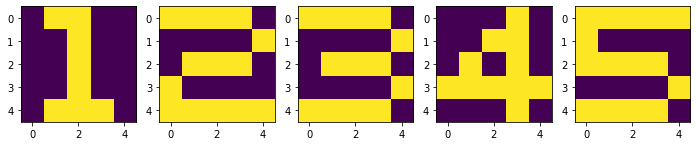

In [5]:
plt.figure(figsize=(12,4))
for n in range(5):
    plt.subplot(1, 5, n+1)
    plt.imshow(X[:, :, n])

plt.show()

In [6]:
def ReLU(x):
    return np.maximum(0, x)

In [7]:
# Relu를 이용한 정방향 계산
def calcOutput_ReLU(W1, W2, W3, W4, x):
    v1 = np.matmul(W1, x)
                        # x :  입력 데이터를 통해
                    # W1 : weight를 통과
    y1 = ReLU(v1)
    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)
    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)
    v = np.matmul(W4, y3)
    y = Softmax(v)

    return y, v1, v2, v3, y1, y2, y3

In [8]:
# 역전파
def backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3):
    e = d - y
    delta = e       # 크로스엔트로피를 사용하였다.

    e3 = np.matmul(W4.T, delta)
            # 맨 마지막 weight와 delta를 곱한다.
    delta3 = (v3 > 0) * e3
            # if v3 > 0 이면 e3 와 곱한다.

    e2 = np.matmul(W3.T, delta3)
    delta2 = (v2 > 0) * e2

    e1 = np.matmul(W2.T, delta2)
    delta1 = (v1 > 0) * e1

    return delta, delta1, delta2, delta3

In [9]:
# 가중치 계산
def calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4):
    dW4 = alpha * delta * y3.T
    W4 = W4 + dW4

    dW3 = alpha * delta3 * y2.T
    W3 = W3 + dW3

    dW2 = alpha * delta2 * y1.T
    W2 = W2 + dW2

    dW1 = alpha * delta1 * x.T
    W1 = W1 + dW1

    return W1, W2, W3, W4

In [10]:
# 가중치 업데이트
def DeepReLU(W1, W2, W3, W4, X, D, alpha):
                            #X : 특성
                                #D : 라벨
                                    #alpha : 학습률
    # 한 에포크의 모든 데이터를 쓴다 . : Gradient Descent 경사하강법
    for k in range(5):
        x  = np.reshape(X[:, :, k], (25, 1))
        d = D[k, :].T

        y, v1, v2, v3, y1, y2, y3 = calcOutput_ReLU(W1, W2, W3, W4, x)
        delta, delta1, delta2, delta3 = backpropagation_ReLU(d, y, W2, W3, W4, v1, v2, v3)
        W1, W2, W3, W4 = calcWs(alpha, delta, delta1, delta2, delta3, y1, y2, y3, x, W1, W2, W3, W4)

    return W1, W2, W3, W4

In [77]:
# 가중치 랜덤하게 설정

W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01
    # 학습률이 너무 작으면, 학습하는데 너무 오래걸릴것이고, 혹은 학습률이 너무크면, 오차함수(비용함수)가 발산해버릴수도 있습니다.
    # 학습률을 적절히 지정해주어야 학습을 빠르고 정확히할 수 있습니다.

for epoch in tqdm.notebook.tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

> ## 왜 랜덤 수치를 `(20,25), (20,20), (5, 20)`으로 설정한걸까?

--------------------

In [97]:
test1 = 2 * np.random.random((20, 25)) - 1
test1.shape

# 첫 가중치의 모양은 (20, 25)이다.

test2 = 2 * np.random.random((20, 20)) - 1
test2.shape

# 두번째 가중치의 모양은 (20, 20)이다... 왜?
## calcOutput_ReLU 의 식을 살펴보자

(20, 20)

In [ ]:
# Relu를 이용한 정방향 계산
# def calcOutput_ReLU(W1, W2, W3, W4, x):
#     v1 = np.matmul(W1, x)
#                         # x :  입력 데이터를 통해
#                         # x  = np.reshape(X[:, :, k], (25, 1))
                # matmul ((20,25) , (25,1)) ==> 20 * 1
#                     # W1 : weight를 통과
#     y1 = ReLU(v1)
                # ReLU(v1) ==> 20 * 1
#     v2 = np.matmul(W2, y1)
                # matmul((20,20), (20,1)) ==> 20 * 1
#     y2 = ReLU(v2)
                # ReLU(v2) ==> 20 * 1
#     v3 = np.matmul(W3, y2)
                # matmul((20, 20), (20, 1)) == > 20 * 1
#     y3 = ReLU(v3)
                # ReLU(v3) ==> 20 * 1
#     v = np.matmul(W4, y3)
                # matmul((5, 20) , (20, 1)) == > 5 * 1
#     y = Softmax(v)
                        # x = np.subtract(x, np.max(x))       # prevent overflow
                        #                     # 기준이 되는 값
                        #                         # 뺄셈할 값

                        #     ex = np.exp(x)

                        #     return ex / np.sum(ex)                

#     return y, v1, v2, v3, y1, y2, y3

## 결론 (추론?)

* 출력값은 `5*1`로 나온다.
* 출력값을 맞추기 위해 맨 마지막 가중치는 `(5, ) 사이즈로 맞춘것`.
* 첫번째 가중치의 경우 `원본 피쳐의 사이즈가 (25, 1)`로 맞춰져 있기 때문에`(np.reshape(X[:,:,k], (25,1))`, W1 = (, 25) 사이즈로 맞춘것.
* 그 이후의 가중치들은 `matmul을 위하여 동일한 사이즈로 계속 맞춰간 것`이다.


## 의문
- Q. 그렇다면 왜 `(20, 25)`로 설정을 하게 된걸까? `(25, 25) 나, (100, 25)` 로 들어가는 것은 안될까? 
# Try it

In [115]:
# 가중치 랜덤하게 설정

W1 = 2 * np.random.random((25, 25)) - 1
W2 = 2 * np.random.random((25, 25)) - 1
W3 = 2 * np.random.random((25, 25)) - 1
W4 = 2 * np.random.random((5, 25)) - 1

alpha = 0.01

for epoch in tqdm.notebook.tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [116]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v  = np.matmul(W4, y3)
    y  = Softmax(v)

    return y

In [117]:
N = 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('-------')

Y = 1: 
[1]
[[9.99971850e-01]
 [2.30657990e-09]
 [5.50419794e-06]
 [1.44660840e-05]
 [8.17765792e-06]]
-------
Y = 2: 
[2]
[[1.15878463e-12]
 [9.99984884e-01]
 [1.41201396e-05]
 [9.96227736e-07]
 [7.37514937e-15]]
-------
Y = 3: 
[3]
[[1.61186550e-05]
 [1.91032640e-05]
 [9.99940536e-01]
 [1.55459140e-09]
 [2.42401101e-05]]
-------
Y = 4: 
[4]
[[1.70351912e-05]
 [1.87180251e-06]
 [2.14274868e-09]
 [9.99981091e-01]
 [3.76661384e-13]]
-------
Y = 5: 
[5]
[[3.14413333e-09]
 [6.27137319e-08]
 [2.63273611e-05]
 [1.89856090e-16]
 [9.99973607e-01]]
-------


# ... 된다!

In [125]:
# 가중치 랜덤하게 설정

W1 = 2 * np.random.random((100, 25)) - 1
W2 = 2 * np.random.random((100, 100)) - 1
W3 = 2 * np.random.random((100, 100)) - 1
W4 = 2 * np.random.random((5, 100)) - 1

alpha = 0.01

for epoch in tqdm.notebook.tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [126]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v  = np.matmul(W4, y3)
    y  = Softmax(v)

    return y

In [127]:
N = 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('-------')

Y = 1: 
[1]
[[1.00000000e+00]
 [3.06683968e-12]
 [2.13719534e-19]
 [9.67550437e-24]
 [5.90454607e-25]]
-------
Y = 2: 
[2]
[[1.10136876e-49]
 [9.99999888e-01]
 [8.41796287e-16]
 [1.12282591e-07]
 [1.99686142e-28]]
-------
Y = 3: 
[3]
[[1.20746500e-21]
 [6.58159790e-10]
 [9.99999107e-01]
 [9.05296997e-13]
 [8.92591657e-07]]
-------
Y = 4: 
[4]
[[7.10688277e-15]
 [1.40057783e-41]
 [6.68450430e-65]
 [1.00000000e+00]
 [1.42821260e-52]]
-------
Y = 5: 
[5]
[[2.02683498e-26]
 [5.34434731e-13]
 [8.44365860e-09]
 [6.90906171e-17]
 [9.99999992e-01]]
-------


# 가중치 사이즈를 조정할 때 발생하는 것들
- 가중치의 shape 크기를 크게해도 된다. 하지만 `그만큼 시간이 걸린다.`
- 결과값이 더욱 `1(100%)에 가깝게` 도달한다. 하지만 `과적합의 문제가 발생하지는 않을까...?` 걱정된다.

-----------------------

In [128]:
# 가중치 랜덤하게 설정

W1 = 2 * np.random.random((20, 25)) - 1
W2 = 2 * np.random.random((20, 20)) - 1
W3 = 2 * np.random.random((20, 20)) - 1
W4 = 2 * np.random.random((5, 20)) - 1

alpha = 0.01

for epoch in tqdm.notebook.tqdm(range(10000)):
    W1, W2, W3, W4 = DeepReLU(W1, W2, W3, W4, X, D, alpha)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [129]:
def verify_algorithm(x, W1, W2, W3, W4):
    v1 = np.matmul(W1, x)
    y1 = ReLU(v1)

    v2 = np.matmul(W2, y1)
    y2 = ReLU(v2)

    v3 = np.matmul(W3, y2)
    y3 = ReLU(v3)

    v  = np.matmul(W4, y3)
    y  = Softmax(v)

    return y

In [130]:
N = 5
for k in range(N):
    x = np.reshape(X[:, :, k], (25,1))
    y = verify_algorithm(x, W1, W2, W3, W4)

    print('Y = {}: '.format(k+1))
    print(np.argmax(y, axis=0) + 1)
    print(y)
    print('-------')

Y = 1: 
[1]
[[9.99982729e-01]
 [6.95148966e-06]
 [1.03032633e-05]
 [3.88816377e-09]
 [1.19020681e-08]]
-------
Y = 2: 
[2]
[[2.02738057e-07]
 [9.99987666e-01]
 [1.09740937e-05]
 [7.47802299e-07]
 [4.09237863e-07]]
-------
Y = 3: 
[3]
[[1.08960398e-05]
 [6.28958242e-07]
 [9.99964615e-01]
 [1.12502000e-06]
 [2.27350129e-05]]
-------
Y = 4: 
[4]
[[6.57978075e-07]
 [2.99773511e-06]
 [1.49091487e-09]
 [9.99986088e-01]
 [1.02547194e-05]]
-------
Y = 5: 
[5]
[[7.29406411e-06]
 [4.28046945e-06]
 [7.66851172e-06]
 [9.23681719e-06]
 [9.99971520e-01]]
-------
